In [4]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import numpy as np
import os
import graphviz
def _exp(x):
    return np.exp(x)
exp = make_function(function=_exp,
                        name='exp',
                        arity=1)
# function nodes
function_set = ['add', 'sub', 'mul', 'div', 'sin', "cos", "log", exp]
# init_depth means depth range for initial generation
gp = SymbolicRegressor(population_size=1000,
                        generations=50,
                        p_crossover=0.7,
                        p_subtree_mutation=0.,
                        p_hoist_mutation=0.,
                        p_point_mutation=0.,
                        stopping_criteria=0.01,
                        verbose=1,
                        parsimony_coefficient=0.01, 
                        function_set=function_set)

# Get Data
data = np.genfromtxt("data.csv", delimiter=",")
x_train = data[:,0].reshape(-1,1)
y_train = data[:,1]

gp.fit(x_train, y_train)
predictions = gp.predict(x_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


<ipython-input-4-11cb80febb26>:7: RuntimeWarning: overflow encountered in exp
  return np.exp(x)


   0    15.91              inf        6         0.229722              N/A     25.00s
   1     8.68          3.46742       26         0.186879              N/A     23.19s
   2     7.89      4.24641e+33        9         0.122848              N/A     21.44s
   3     6.03         0.487014       11         0.104048              N/A     20.11s
   4     5.43          0.46572       11         0.100697              N/A     19.53s
   5     8.38         0.510341       11         0.100697              N/A     19.32s
   6     9.32          0.48303       11         0.100697              N/A     21.85s
   7     9.56         0.440605       11         0.100697              N/A     18.69s
   8    10.01         0.419594       11         0.100697              N/A     18.21s
   9     9.99         0.388084       10          0.10658              N/A     17.84s
  10     9.96         0.387106       10          0.10658              N/A     17.79s
  11    10.13         0.431311       10          0.10658         

In [5]:
print(predictions)

[ 1.58533775e-02 -2.20750334e-03 -2.34985020e-02 -4.67197269e-02
 -6.99143795e-02 -9.03859189e-02 -1.04633239e-01 -1.08311415e-01
 -9.62259118e-02 -6.23681629e-02  0.00000000e+00  9.82064846e-02
  2.39968511e-01  4.33128524e-01  6.85325978e-01  1.00360777e+00
  1.39398384e+00  1.86093875e+00  2.40691450e+00  3.03178471e+00
  3.73234472e+00]


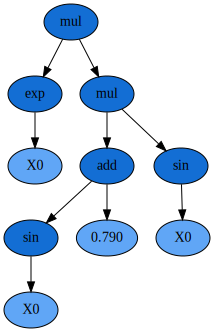

In [6]:
dot_data = gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph